# **Import Library**

In [ ]:
#import library untuk kmeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **Import Dataset Iris**

In [ ]:
#Import dataset menggunakan link gdrive
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1bzNeBFljaeHsNnB1wici3efAQvVn-may')

#Menampilkan 5 baris teratas
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# **Data Preperation**

In [ ]:
#Cek missing value
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


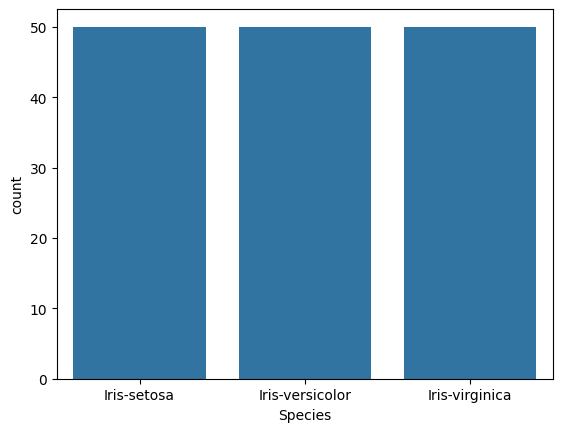

In [ ]:
#Cek variasi spesies
sns.countplot(x='Species', data=df)
plt.show()

In [ ]:
#Hapus kolom yang tidak digunakan
x = df.drop(['Id', 'Species'], axis=1)
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
#Transform Data
le = LabelEncoder()
df['SpeciesEncoded'] = le.fit_transform(df['Species'])

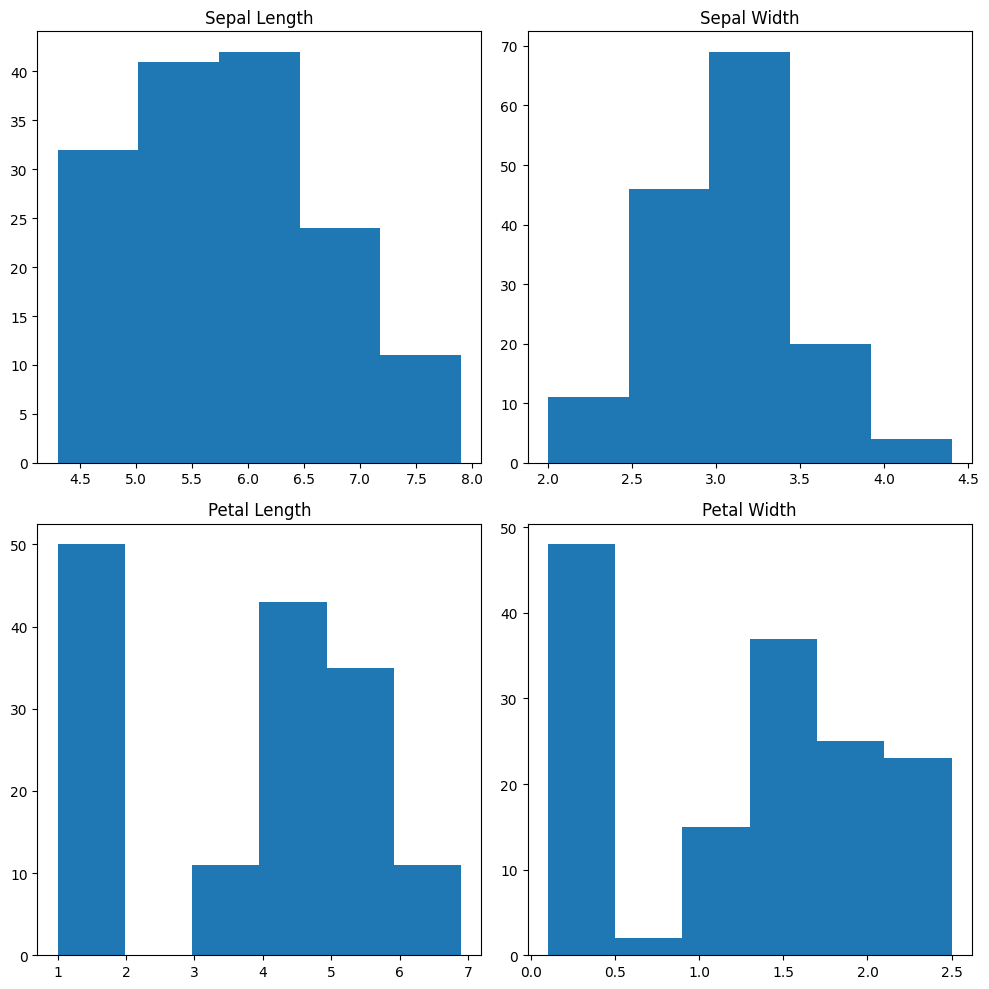

In [ ]:
#Distribusi Data
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

#Histogram 1: Sepal Length
axes[0, 0].set_title('Sepal Length')
axes[0, 0].hist(x['SepalLengthCm'], bins=5)

#Histogram 2: Sepal Width
axes[0, 1].set_title('Sepal Width')
axes[0, 1].hist(x['SepalWidthCm'], bins=5)

#Histogram 3: Petal Length
axes[1, 0].set_title('Petal Length')
axes[1, 0].hist(x['PetalLengthCm'], bins=6)

#Histogram 4: Petal Width
axes[1, 1].set_title('Petal Width')
axes[1, 1].hist(x['PetalWidthCm'], bins=6)

plt.tight_layout()
plt.show()

# **Standarisasi Data**

In [ ]:
#Standarisasi
scaler = StandardScaler()
x = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

x = scaler.fit_transform(x)
x[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

# **Mencari Nilai Best K**

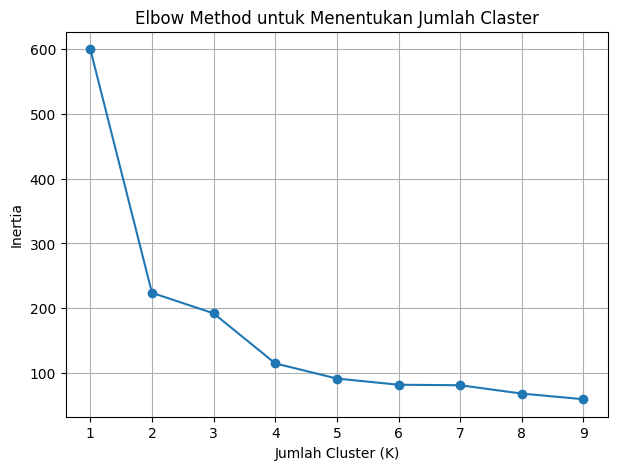

In [ ]:
#Elbow Method untuk K paling optimal
inertia_list = []
k_range = range(1, 10)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(x)
    inertia_list.append(km.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(k_range, inertia_list, marker='o')
plt.title('Elbow Method untuk Menentukan Jumlah Claster')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# **Modeling**

In [ ]:
#Memanggil model Kmeans
kmeans = KMeans(
    n_clusters=3, #dataset iris memiliki 3 spesies
    init="k-means++",
    random_state=42)

#Latih model
kmeans.fit(x)

KMeans(n_clusters=3, random_state=42)

In [ ]:
#Prediksi cluster untuk data x
labels = kmeans.predict(x)

In [ ]:
#Masukkan ke dalam dataframe
df['Cluster'] = labels

In [ ]:
# df['Cluster'] = kmeans.predict(x)

#Cetak
print("Cluster ditemukan:", df['Cluster'].unique())

Cluster ditemukan: [1 2 0]


In [ ]:
#Silhouette Score
sill_score = silhouette_score(x, df['Cluster'])
print("Silhouette Score:", sill_score)

Silhouette Score: 0.4787241921049546


In [ ]:
#Cofusion Matrix
print("Confusion Matrix:\n")
cm = confusion_matrix(df['SpeciesEncoded'], df['Cluster'])
print(cm)

Confusion Matrix:

[[ 0 32 18]
 [46  0  4]
 [50  0  0]]


# **Visualisasi Confusion Matrix**

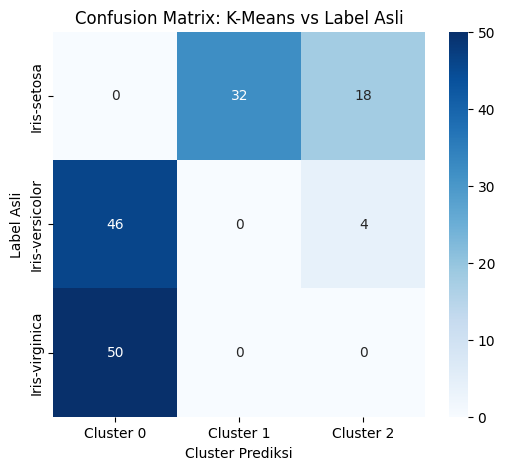

In [ ]:
#Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'],
    yticklabels=le.classes_)

plt.title('Confusion Matrix: K-Means vs Label Asli')
plt.xlabel('Cluster Prediksi')
plt.ylabel('Label Asli')
plt.show()

# **2D dan 3D Visualisasi Model**

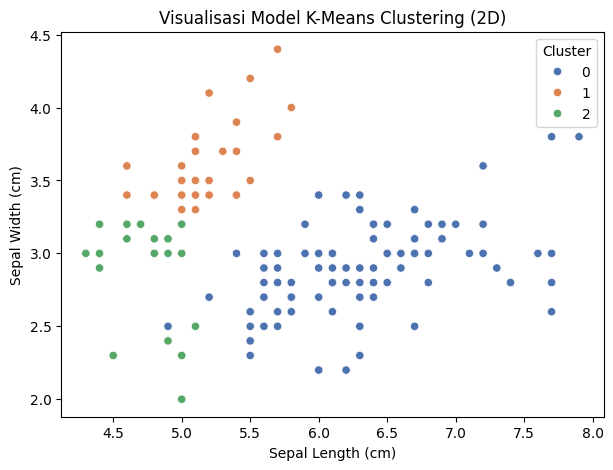

In [ ]:
#Visualisasi model K-Means (2D)
plt.figure(figsize=(7, 5))
sns.scatterplot(
    x=df["SepalLengthCm"],
    y=df["SepalWidthCm"],
    hue=df["Cluster"],
    palette="deep"
)

plt.title('Visualisasi Model K-Means Clustering (2D)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

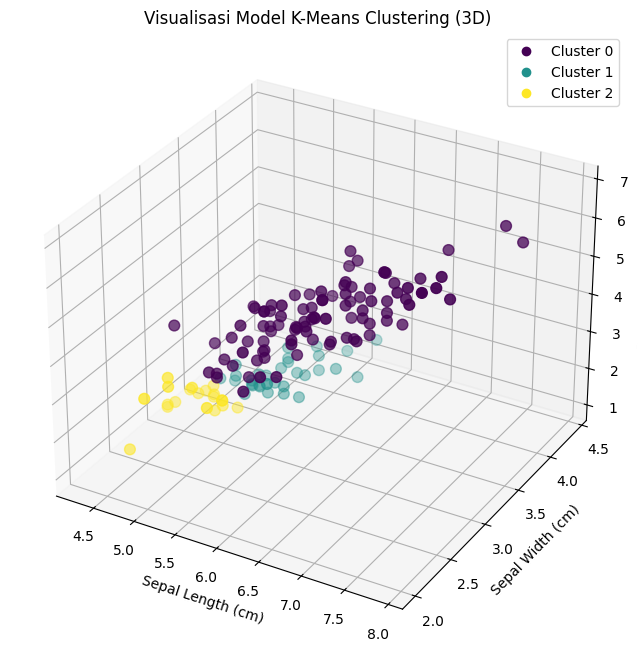

In [ ]:
#Visualisasi model K-Means (3D)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df['SepalLengthCm'],
    df['SepalWidthCm'],
    df['PetalLengthCm'],
    c=df['Cluster'],
    s=60
)

ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')
ax.set_title('Visualisasi Model K-Means Clustering (3D)')

legend_labels = [f"Cluster {i}" for i in range(3)]
ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.show()